In [87]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import cufflinks as cf
import re
import plotly.express as px
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected= True)
cf.go_offline()
%matplotlib inline

In [4]:
url = 'https://www.basketball-reference.com/leagues/NBA_2019_per_game.html'
html_tables = pd.read_html(url)
df = html_tables[0]
df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,...,.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,...,.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,3,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,...,.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,4,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,...,.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,5,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,...,.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,528,Tyler Zeller,C,29,MEM,4,1,20.5,4.0,7.0,...,.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5
730,529,Ante Žižić,C,22,CLE,59,25,18.3,3.1,5.6,...,.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8
731,530,Ivica Zubac,C,21,TOT,59,37,17.6,3.6,6.4,...,.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9
732,530,Ivica Zubac,C,21,LAL,33,12,15.6,3.4,5.8,...,.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5


In [70]:
#cleaning repeated header every 20 or so rows
data = df.drop(index=df[df['Rk'] == 'Rk'].index).reset_index()
#cleaning data and transforming them into float/int values
col =  ['Age','G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT','FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST','STL', 'BLK', 'TOV', 'PF','PTS']
for i in col:
    data[i] = pd.to_numeric(data[i])
    #filling na with 0
    #data[i] = data[i].fillna(0)
data.head(25)

,index,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,1,2,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,...,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,2,3,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,...,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,3,4,Steven Adams,C,25,OKC,80,80,33.4,6.0,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,4,5,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,...,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
5,5,6,Deng Adel,SF,21,CLE,19,3,10.2,0.6,...,1.000,0.2,0.8,1.0,0.3,0.1,0.2,0.3,0.7,1.7
6,6,7,DeVaughn Akoon-Purcell,SG,25,DEN,7,0,3.1,0.4,...,0.500,0.1,0.4,0.6,0.9,0.3,0.0,0.3,0.6,1.0
7,7,8,LaMarcus Aldridge,C,33,SAS,81,81,33.2,8.4,...,0.847,3.1,6.1,9.2,2.4,0.5,1.3,1.8,2.2,21.3
8,8,9,Rawle Alkins,SG,21,CHI,10,1,12.0,1.3,...,0.667,1.1,1.5,2.6,1.3,0.1,0.0,0.8,0.7,3.7
9,9,10,Grayson Allen,SG,23,UTA,38,2,10.9,1.8,...,0.750,0.1,0.5,0.6,0.7,0.2,0.2,0.9,1.2,5.6


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   708 non-null    int64  
 1   Rk      708 non-null    object 
 2   Player  708 non-null    object 
 3   Pos     708 non-null    object 
 4   Age     708 non-null    int64  
 5   Tm      708 non-null    object 
 6   G       708 non-null    int64  
 7   GS      708 non-null    int64  
 8   MP      708 non-null    float64
 9   FG      708 non-null    float64
 10  FGA     708 non-null    float64
 11  FG%     702 non-null    float64
 12  3P      708 non-null    float64
 13  3PA     708 non-null    float64
 14  3P%     661 non-null    float64
 15  2P      708 non-null    float64
 16  2PA     708 non-null    float64
 17  2P%     693 non-null    float64
 18  eFG%    702 non-null    float64
 19  FT      708 non-null    float64
 20  FTA     708 non-null    float64
 21  FT%     665 non-null    float64
 22  OR

In [72]:
data.describe()

,index,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,702.000000,708.000000,708.000000,...,665.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000
mean,366.399718,26.142655,42.882768,19.847458,19.265254,3.091949,6.885028,0.437301,0.884181,2.558898,...,0.739629,0.821610,2.738701,3.557345,1.834605,0.609746,0.370339,1.033475,1.724859,8.384322
std,212.066914,4.141178,26.282043,25.858704,9.023905,2.116415,4.396151,0.109997,0.788803,2.059268,...,0.143505,0.771119,1.870375,2.488335,1.642428,0.420888,0.387384,0.748687,0.812302,5.828200
min,0.000000,19.000000,1.000000,0.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,182.750000,23.000000,19.000000,0.000000,12.200000,1.500000,3.500000,0.400000,0.300000,0.900000,...,0.684000,0.300000,1.475000,1.800000,0.800000,0.300000,0.100000,0.500000,1.200000,4.000000
50%,366.500000,26.000000,44.000000,6.000000,19.100000,2.600000,6.000000,0.434000,0.800000,2.200000,...,0.763000,0.600000,2.300000,3.000000,1.300000,0.500000,0.300000,0.900000,1.700000,7.000000
75%,549.250000,29.000000,68.000000,32.000000,27.100000,4.200000,9.400000,0.485000,1.300000,3.800000,...,0.825000,1.100000,3.600000,4.625000,2.400000,0.800000,0.500000,1.400000,2.300000,11.500000
max,733.000000,42.000000,82.000000,82.000000,36.900000,10.800000,24.500000,1.000000,5.100000,13.200000,...,1.000000,5.400000,11.100000,15.600000,10.700000,2.400000,2.700000,5.000000,4.000000,36.100000


Text(0.5, 1.0, 'Most Played Position in the nba')

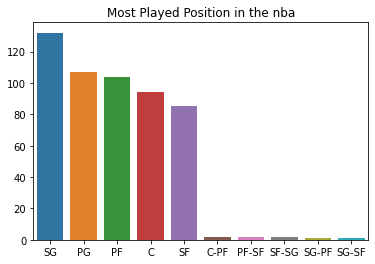

In [76]:
tempdata = data.drop_duplicates(subset = 'Player')
pos = tempdata['Pos'].value_counts()

sns.barplot(x = pos.index, y= pos.values)
plt.title('Most Played Position in the nba')

<AxesSubplot:>

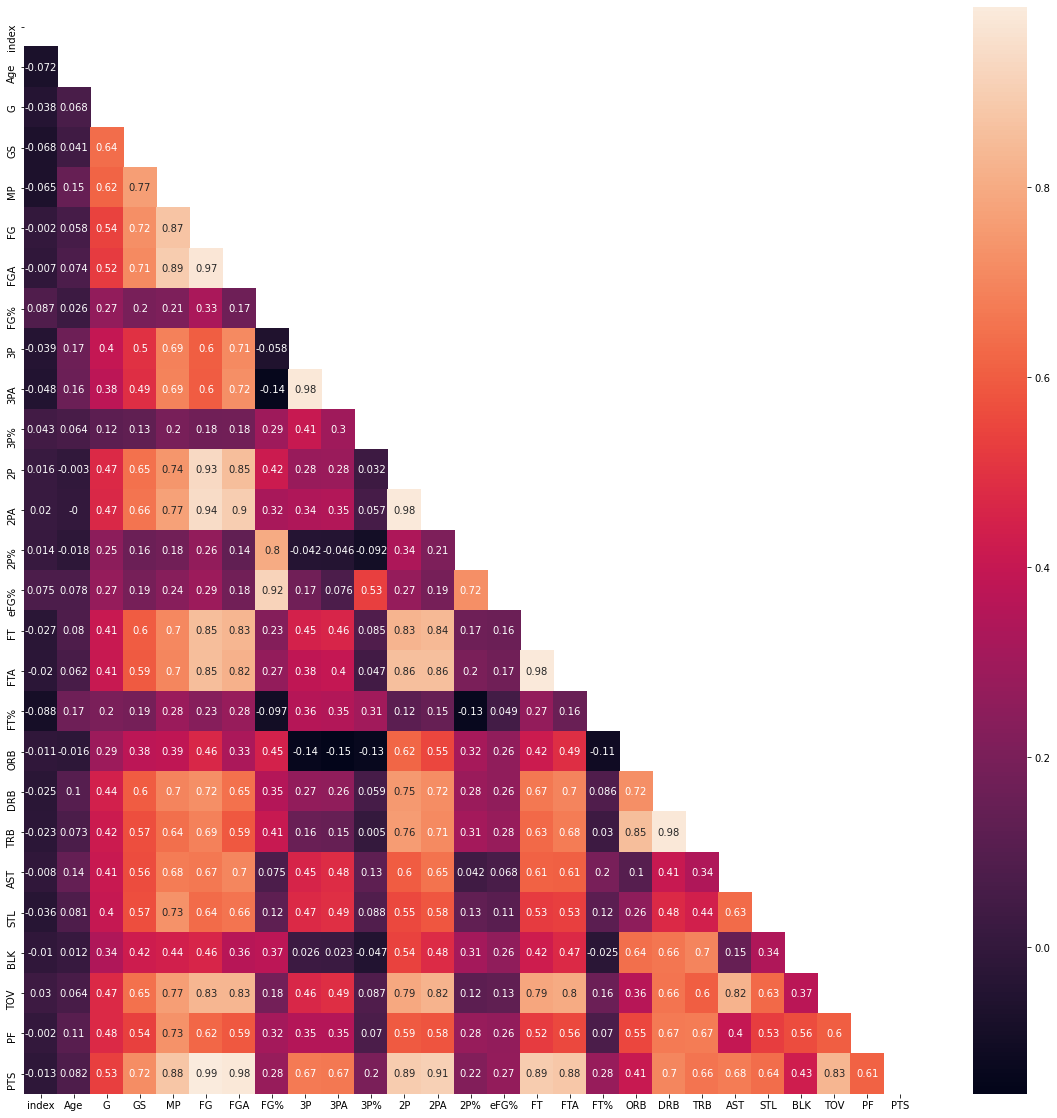

In [79]:
#heatmap of different correlation
plt.figure(figsize=(20,20))
matrix = data.corr()
matrix = matrix.round(decimals = 3)
mask = np.zeros_like(matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(matrix, annot= True, mask = mask)


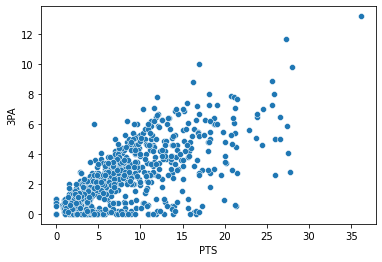

In [99]:
sns.scatterplot(data = data, x = 'PTS', y = '3PA')
px.scatter(data, x = 'PTS',y = '3PA', hover_data  = ['Player'])

In [104]:
dflst = []
for i in range(1980,2021):
    url = f'https://www.basketball-reference.com/leagues/NBA_{i}_per_game.html'
    html_tables = pd.read_html(url)
    df = html_tables[0]
    dflst.append(df)


In [115]:
advancedstats = []
for i in range(1980,2021):
    url = f'https://www.basketball-reference.com/leagues/NBA_{i}_advanced.html'
    html = pd.read_html(url)
    advancedstats.append(html_tables[0])



new data

In [202]:
pergamedata = pd.concat(dflst)
advanceddata = pd.concat(advancedstats)
pergamedata = pergamedata.drop_duplicates(subset=['Rk','G','GS','ORB','Age','Tm'], keep=False)
advanceddata = advanceddata.drop(index=advanceddata[advanceddata['Rk'] == 'Rk'].index).reset_index()
#joined = pd.merge(pergamedata,advanceddata)
pergamedata.head(27)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Kareem Abdul-Jabbar*,C,32,LAL,82,NaN,38.3,10.2,16.9,...,.765,2.3,8.5,10.8,4.5,1.0,3.4,3.6,2.6,24.8
1,2,Tom Abernethy,PF,25,GSW,67,NaN,18.2,2.3,4.7,...,.683,0.9,1.9,2.9,1.3,0.5,0.2,0.6,1.8,5.4
2,3,Alvan Adams,C,25,PHO,75,NaN,28.9,6.2,11.7,...,.797,2.1,6.0,8.1,4.3,1.4,0.7,2.9,3.2,14.9
3,4,Tiny Archibald*,PG,31,BOS,80,80,35.8,4.8,9.9,...,.830,0.7,1.7,2.5,8.4,1.3,0.1,3.0,2.7,14.1
4,5,Dennis Awtrey,C,31,CHI,26,NaN,21.5,1.0,2.3,...,.640,1.1,3.3,4.4,1.5,0.5,0.6,1.0,2.5,3.3
5,6,Gus Bailey,SG,28,WSB,20,NaN,9.0,0.8,1.8,...,.385,0.3,1.1,1.4,1.3,0.4,0.2,0.6,0.9,1.9
6,7,James Bailey,PF,22,SEA,67,NaN,10.8,1.8,4.0,...,.673,1.1,1.9,2.9,0.4,0.3,0.8,1.2,1.7,4.7
7,8,Greg Ballard,SF,25,WSB,82,NaN,29.7,6.6,13.4,...,.753,2.9,4.9,7.8,1.9,1.1,0.4,1.6,2.4,15.6
8,9,Mike Bantom,SF,28,IND,77,NaN,30.3,5.0,9.9,...,.665,2.5,3.4,5.9,3.6,1.1,0.6,2.5,3.5,11.8
9,10,Marvin Barnes,PF,27,SDC,20,NaN,14.4,1.2,3.0,...,.500,1.7,2.2,3.9,0.9,0.3,0.6,0.9,2.6,3.2


In [203]:
for i in col:
    pergamedata[i] = pd.to_numeric(pergamedata[i])


In [204]:
#selecting only players with more than 20pts avg
morethan20 = pergamedata[pergamedata['PTS']>=20]
#morethan20.info()
px.scatter(morethan20, x = 'PTS', y = 'FG%', hover_data  = ['Player'])

In [180]:
pergamedata['Rk'].str.contains("Rk").index#.sort_values('PTS', ascending= False)

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            667, 668, 669, 670, 671, 672, 673, 674, 675, 676],
           dtype='int64', length=21786)

In [191]:
 pergamedata.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
672    False
673    False
674    False
675    False
676    False
Length: 21786, dtype: bool